### Importing Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Loading the Dataset & Reading the Dataset

In [2]:
# Loading the Dataset
# Reading the Dataset
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
iris = fetch_ucirepo(id=53) 
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
# metadata 
print(iris.metadata) 
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [3]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True).frame  # Loads the Iris dataset into a pandas DataFrame
import seaborn as sns
iris = sns.load_dataset('iris')
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [4]:
iris.shape

(150, 5)

In [5]:
# Dataset Columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#Dataset Summary
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Dataset Statistical Summary
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking Null Values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
#Checking columns count of "Species"
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Data Visualization

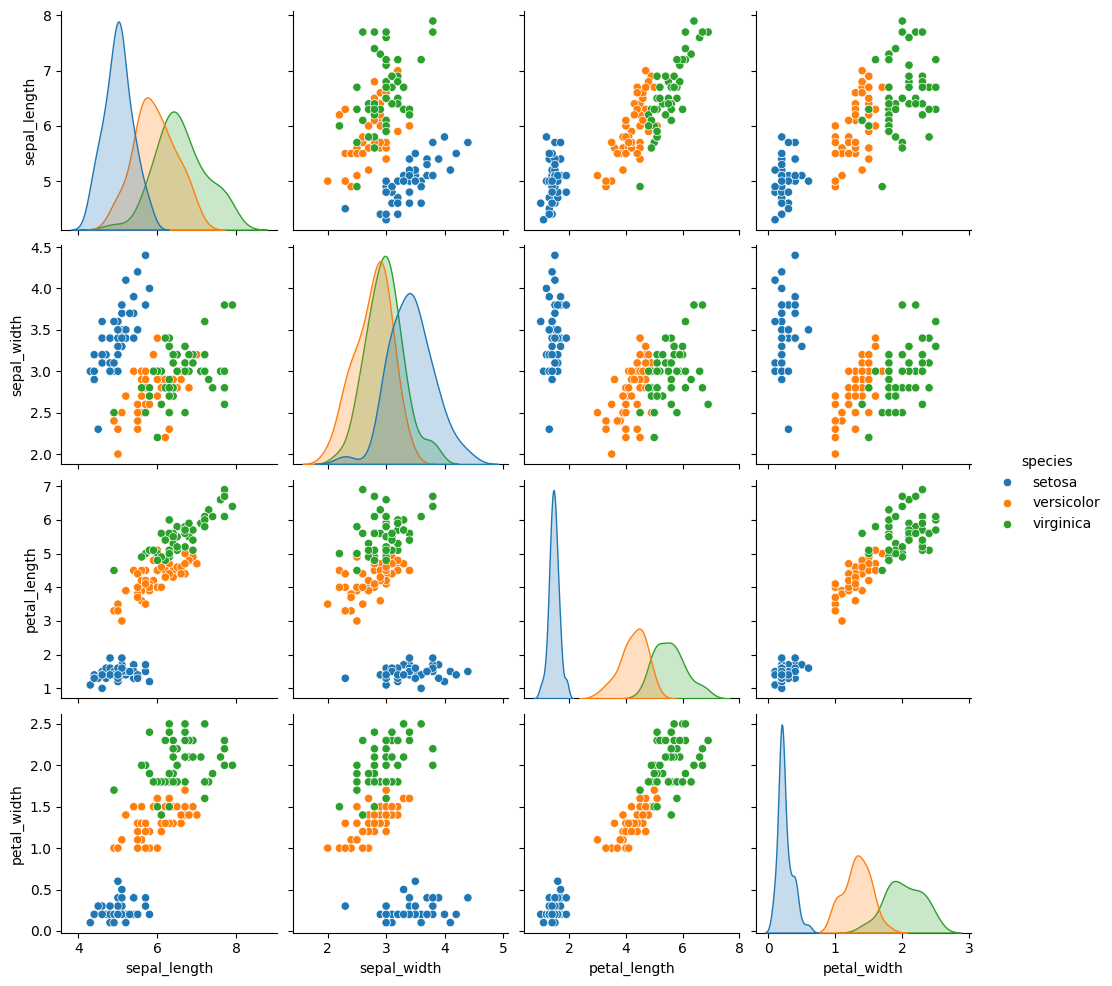

In [11]:
sns.pairplot(iris,hue='species')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

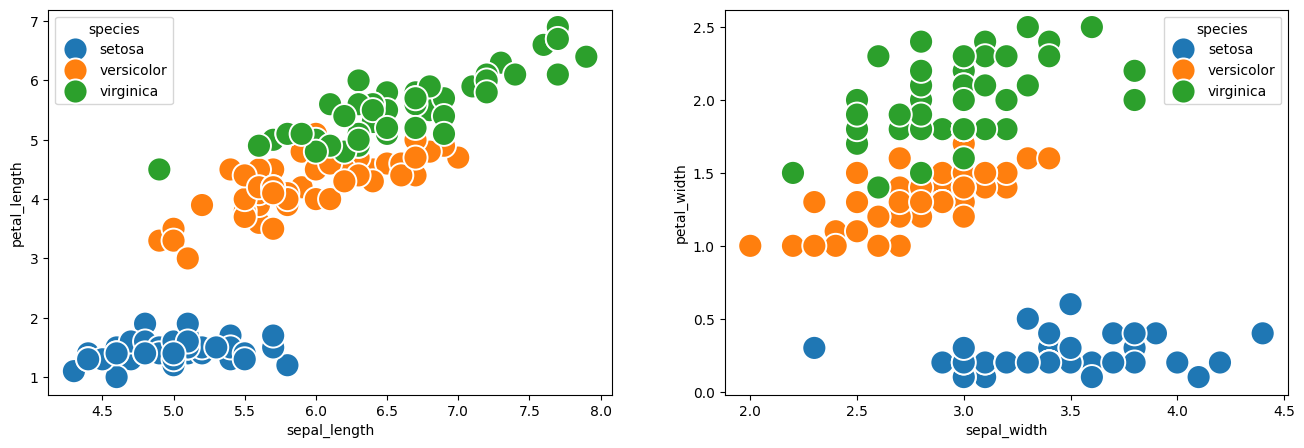

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal_length',y='petal_length',data=iris,hue='species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='sepal_width',y='petal_width',data=iris,hue='species',ax=ax2,s=300,marker='o')

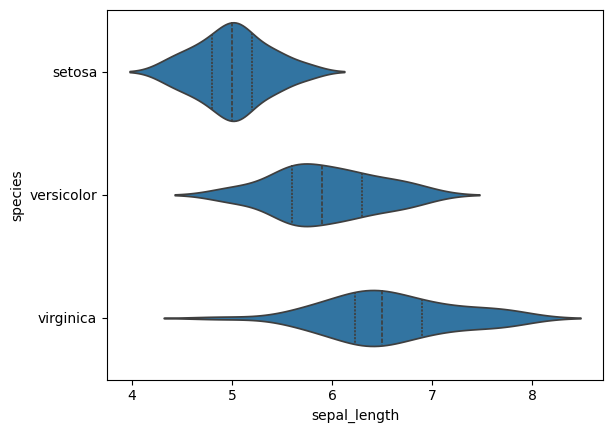

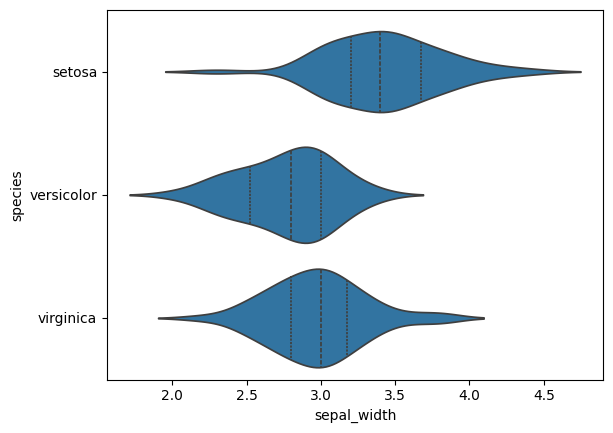

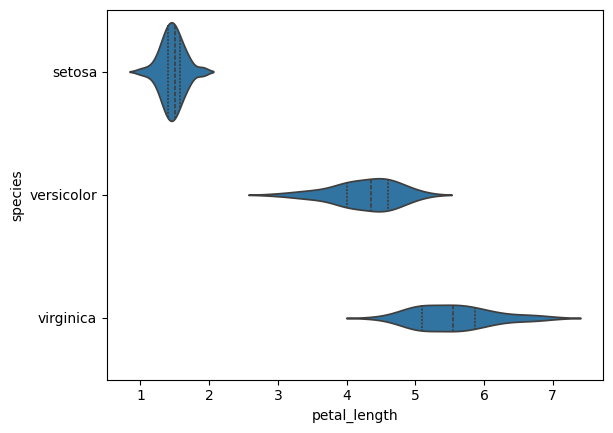

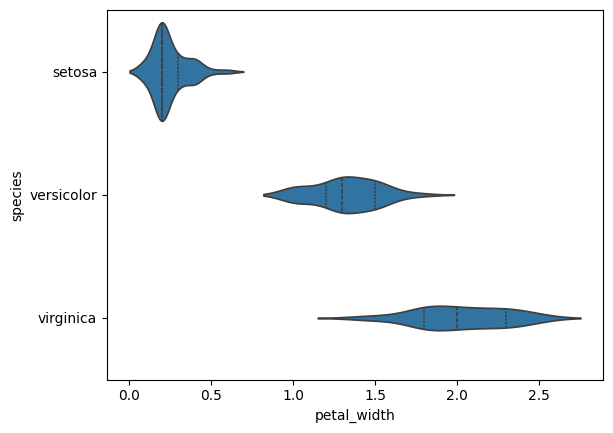

In [13]:
sns.violinplot(y='species', x='sepal_length', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='species', x='sepal_width', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_length', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_width', data=iris, inner='quartile')
plt.show()

<Axes: ylabel='count'>

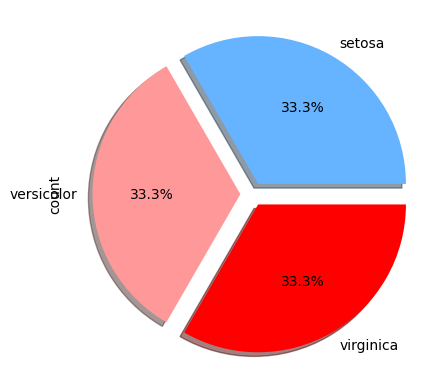

In [14]:
#Pie plot to show the overall types of Iris classifications
colors = ['#66b3ff','#ff9999','red']
iris['species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

## Heat Plot for Data

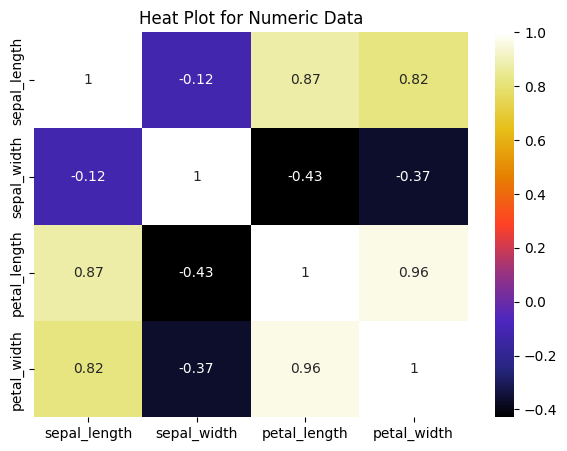

In [15]:
# Drop non-numeric columns
iris_numeric = iris.drop(columns=['species'])
# Now you can create the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(iris_numeric.corr(), annot=True, cmap='CMRmap')
plt.title('Heat Plot for Numeric Data')
plt.show()

In [16]:
#Defining independent and dependent variables
features = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris.loc[:, features].values   #defining the feature matrix
y = iris.species

## Splitting the dataset into training and test sets

In [17]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)
#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualizing the decision tree

[Text(0.4, 0.9, 'petal_length <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal_length <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = virginica'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'petal_width <= 1.65\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal_width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal_length <= 5.05\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal_width <= 2.75\ngini = 0.444\nsamples = 3\nvalue =

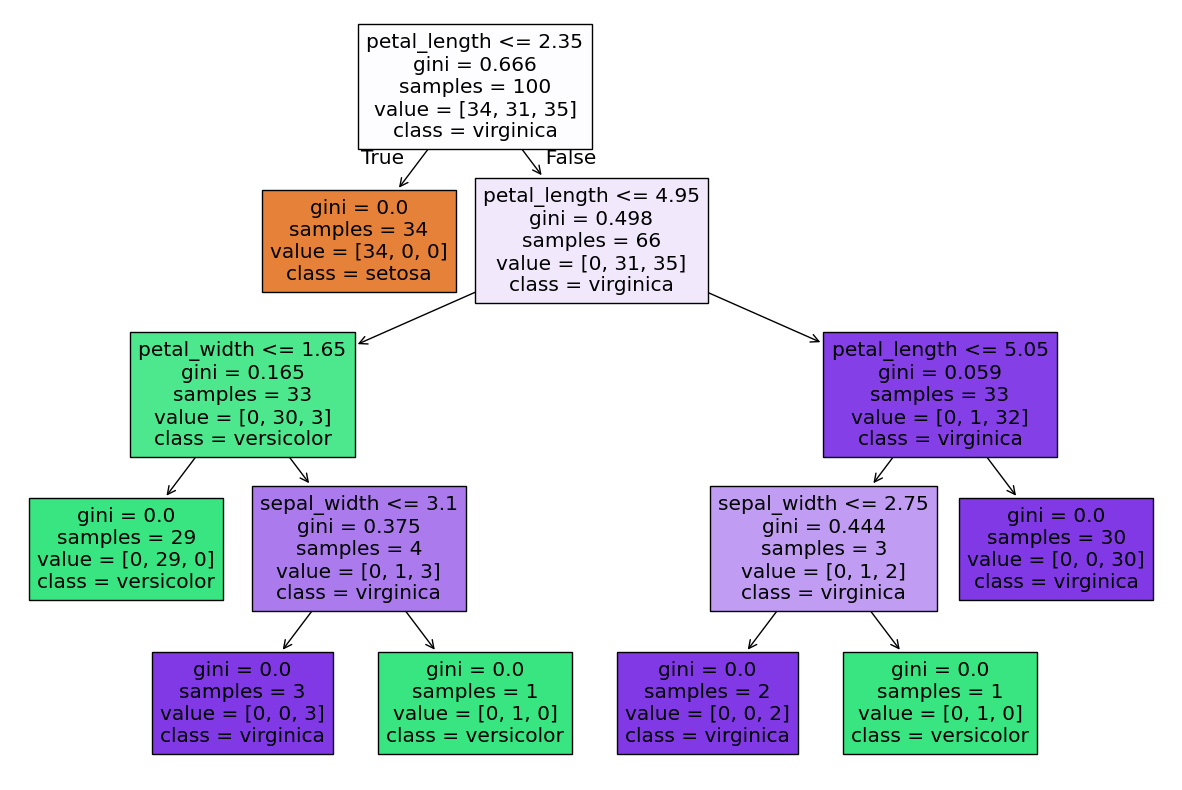

In [18]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal_length','sepal_width','petal_length','petal_width']
class_name= iris.species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

## Prediction on test data

In [19]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica'], dtype=object)

## Checking the accuracy of the model

In [20]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.98


## plotting confusion matrix

In [21]:
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))

In [22]:
print('Decision Tree Classifier')
report(dtree)
print(f'Accuracy: {round(score*100,2)}%')

Decision Tree Classifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 98.0%


In [23]:
confusion_matrix(y_test, y_pred)


array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]], dtype=int64)

In [24]:
#Predicting the output class for random values for petal and sepal length and width
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively

dtree.predict([[5, 3.6, 1.4 , 0.2]])

array(['setosa'], dtype=object)

In [25]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 3.1cm, 5cm and 1.5cm respectively

dtree.predict([[9, 3.1, 5, 1.5]])

array(['versicolor'], dtype=object)

In [26]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 4.1cm, 3cm, 5.1cm and 1.8cm respectively

dtree.predict([[4.1, 3.0, 5.1, 1.8]])

array(['virginica'], dtype=object)

# THANK YOU!!:)